# Descrição do Projeto

A empresa Sweet Lift Taxi coletou dados históricos sobre pedidos de táxi nos aeroportos. Para atrair mais motoristas durante o horário de pico, precisamos prever a quantidade de pedidos de táxi para a próxima hora. 	
Construa um modelo para tal predição.

A métrica REQM no conjunto de teste não deve ser superior a 48.

## Instruções do projeto

1. Faça download dos dados e faça uma nova amostragem em uma hora.
2. Analise os dados
3. Treine diferentes modelos com diferentes hiperparâmetros. A amostra de teste deve ser 10% do conjunto de dados inicial.
4. Teste os dados usando a amostra de teste e forneça uma conclusão.

## Descrição dos dados

Os dados são armazenados no arquivo `taxi.csv`. O número de pedidos está na coluna `num_orders`.

## Preparação 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [4]:
df

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32
...,...
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27


* Nenhum valor faltante

## Análise

In [5]:
df.sort_index(inplace=True)
display(df.index.is_monotonic)
df.info()

True

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


### Meses 03 - 04

<AxesSubplot:xlabel='datetime'>

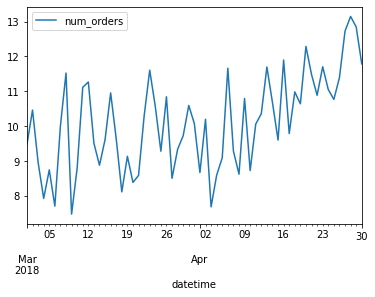

In [6]:
df1 = df['2018-03':'2018-04'].resample('1D').mean()

df1.plot()

<AxesSubplot:xlabel='datetime'>

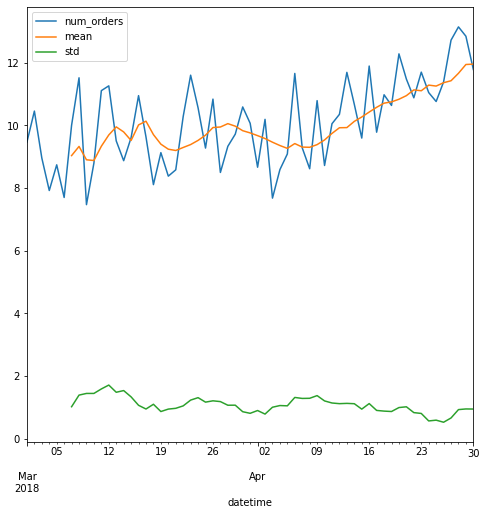

In [7]:
df1['mean'] = df1['num_orders'].rolling(7).mean()
df1['std'] = df1['num_orders'].rolling(7).std()
df1.plot(figsize =(8,8)) 

<AxesSubplot:xlabel='datetime'>

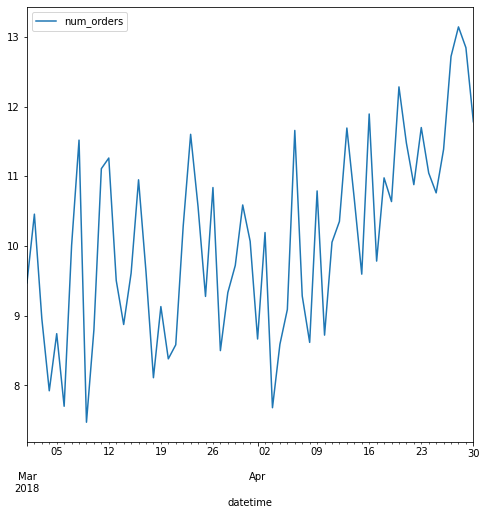

In [8]:
dfday0304 = df['2018-03':'2018-04'].resample('1D').mean()
dfday0304.plot(figsize =(8,8))

In [51]:
pv = pd.pivot_table(dfday0304, values='num_orders', index=dfday0304.index.month, columns=dfday0304.index.dayofweek, aggfunc='mean', fill_value=0)
pv

datetime,0,1,2,3,4,5,6
datetime,,,,,,,
3,9.994792,8.522569,9.199653,10.122222,10.215278,9.604167,9.105903
4,11.273611,9.309028,10.097222,10.368056,12.090278,11.145833,10.122222


**Março**
* Dias da semana que **menos** têm atividade: **Terça e Domingo**
* Dias da semana que **mais** têm atividade: **Quinta e Sexta**

**Abril**
* Dias da semana que **menos** têm atividade: **Terça e Quarta**
* Dias da semana que **mais** têm atividade: **Segunda e Sexta**


<AxesSubplot:xlabel='datetime'>

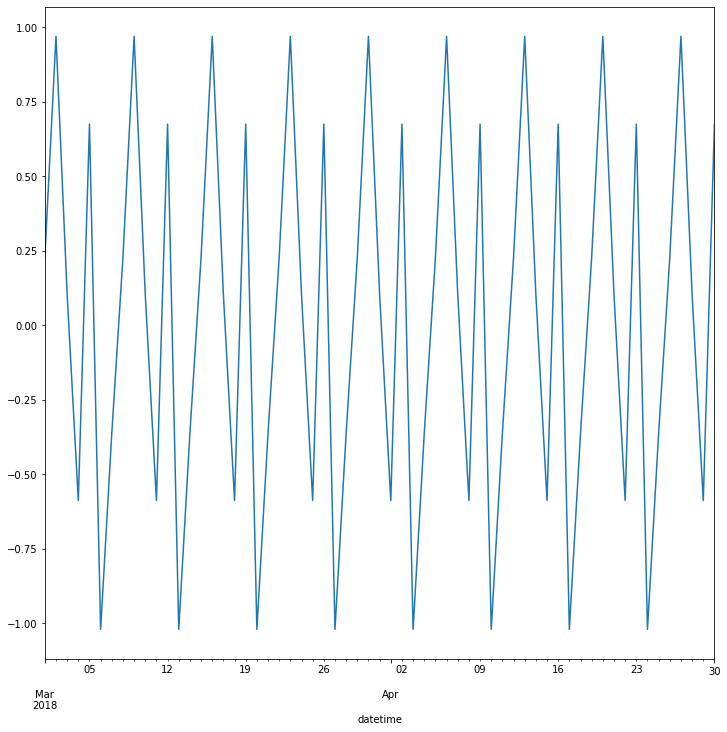

In [9]:
decomposed = seasonal_decompose(dfday0304)

decomposed.seasonal.plot(figsize=(12,12))

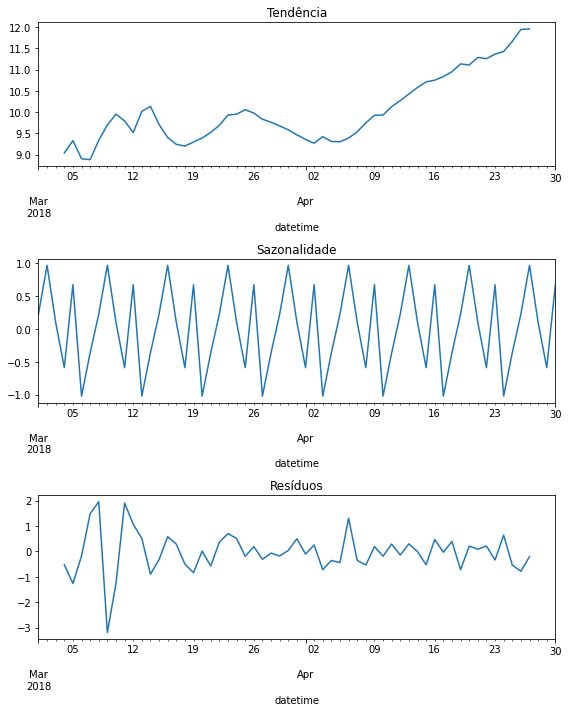

In [10]:
plt.figure(figsize=(8, 10))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Tendência')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Sazonalidade')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Resíduos')
plt.tight_layout()

**Conclusão**

* No gráfico de sazonalidade podemos perceber um claro padrão estacionário pois a média e o desvio padrão não mudam
* Abril tem um aumento de tendência que se confirma em todos os gráficos pois abril teve picos maiores de num_orders que março, acredito que provavelmente devido ao clima que está esquentando.
* Março não teve uma tendência muito clara. Ao final do gráfico se confirma uma tendência crescente

**Análise de dias da semana**

* Dias de **menos** atividade **em comum** entre os meses: **Terça**
* Dias de **mais** atividade **em comum** entre os meses: **Sexta**

### Meses 05 - 06

<AxesSubplot:xlabel='datetime'>

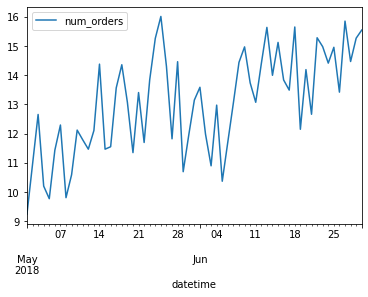

In [11]:
df2=df['2018-05':'2018-06'].resample('1D').mean()
df2.plot()

<AxesSubplot:xlabel='datetime'>

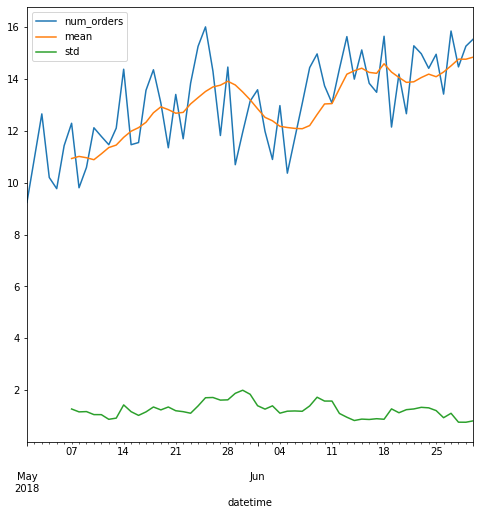

In [12]:
df2['mean'] = df2['num_orders'].rolling(7).mean()
df2['std'] = df2['num_orders'].rolling(7).std()
df2.plot(figsize =(8,8)) 

<AxesSubplot:xlabel='datetime'>

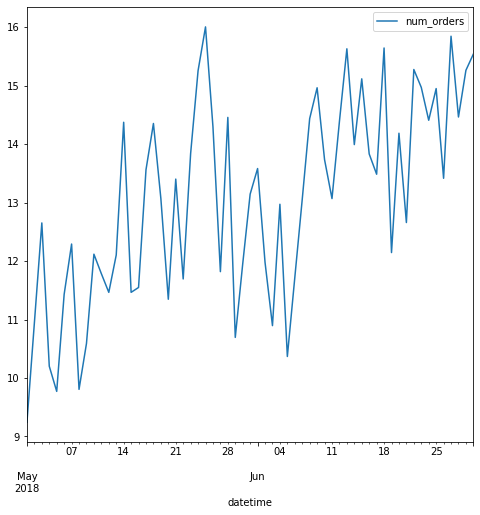

In [13]:
dfday0506 = df['2018-05':'2018-06'].resample('1D').mean()
dfday0506.plot(figsize =(8,8))

In [52]:
pv1 = pd.pivot_table(dfday0506, values='num_orders', index=dfday0506.index.month, columns=dfday0506.index.dayofweek, aggfunc='mean', fill_value=0)
pv1

datetime,0,1,2,3,4,5,6
datetime,,,,,,,
5,13.631944,10.580556,11.775000,13.347222,13.086806,12.151042,11.675347
6,14.159722,12.579861,14.345486,13.543403,14.736111,14.258333,13.131944


**Maio**
* Dias da semana que **menos** têm atividade: **Terça e Domingo**
* Dias da semana que **mais** têm atividade: **Segunda e Quinta**

**Junho**
* Dias da semana que **menos** têm atividade: **Terça e Domingo**
* Dias da semana que **mais** têm atividade: **Quarta e Sexta**

<AxesSubplot:xlabel='datetime'>

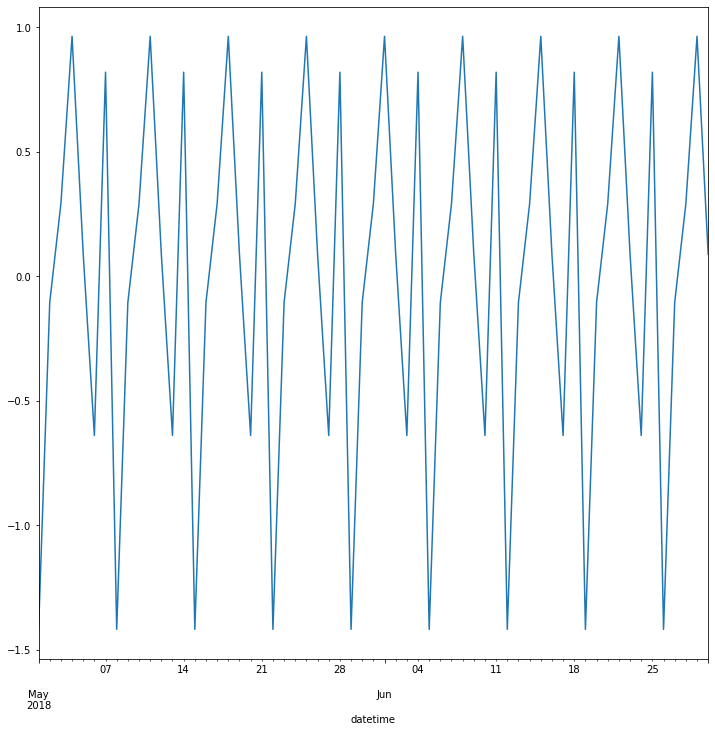

In [14]:
decomposed = seasonal_decompose(dfday0506)
decomposed.seasonal.plot(figsize=(12,12))

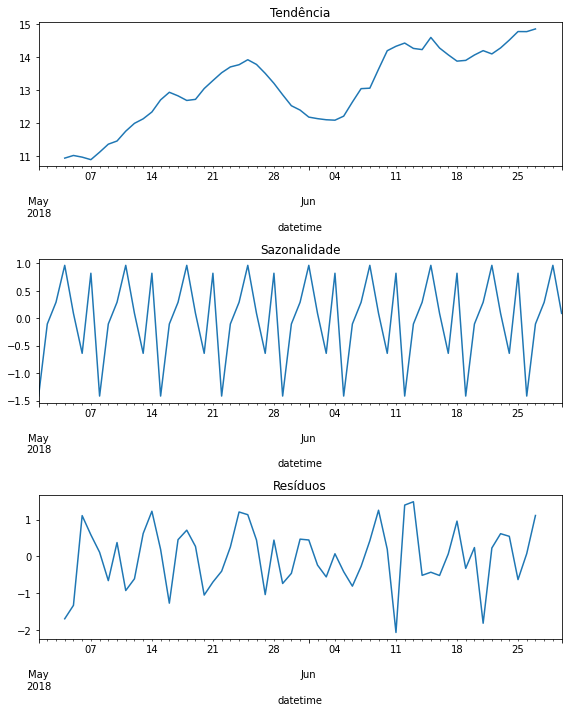

In [15]:
plt.figure(figsize=(8, 10))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Tendência')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Sazonalidade')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Resíduos')
plt.tight_layout()

**Conclusão**
* O comportamento de sazonalidade é o mesmo. Estacionário.
* Maio teve um pico maior que abril, porém menor que junho.
* A tendência sempre cresceu a não ser nos dias finais de maio e primeiros dias de junho. Terminando em crescente mesmo assim com o pico de junho superando todos até agora.

**Análise de dias da semana**

* Dias de **menos** atividade **em comum** entre os meses: **Terça e Domingo**
* Dias de **mais** atividade **em comum** entre os meses: **Nenhum**

### Meses 07 - 08

<AxesSubplot:xlabel='datetime'>

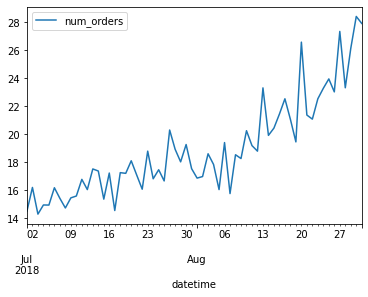

In [16]:
df3=df['2018-07':'2018-08'].resample('1D').mean()
df3.plot()

<AxesSubplot:xlabel='datetime'>

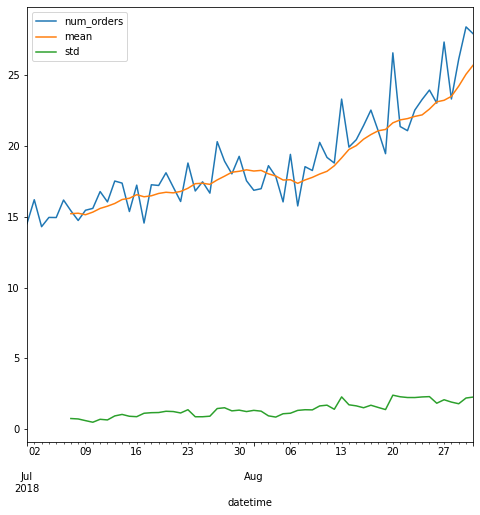

In [17]:
df3['mean'] = df3['num_orders'].rolling(7).mean()
df3['std'] = df3['num_orders'].rolling(7).std()
df3.plot(figsize =(8,8)) 

<AxesSubplot:xlabel='datetime'>

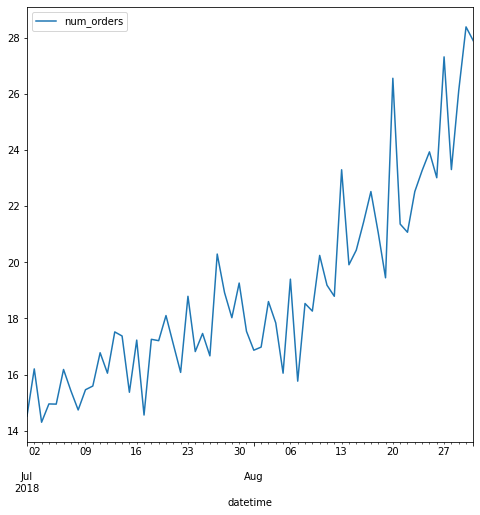

In [18]:
dfday0708 = df['2018-07':'2018-08'].resample('1D').mean()
dfday0708.plot(figsize =(8,8))

In [53]:
pv2 = pd.pivot_table(dfday0708, values='num_orders', index=dfday0708.index.month, columns=dfday0708.index.dayofweek, aggfunc='mean', fill_value=0)
pv2

datetime,0,1,2,3,4,5,6
datetime,,,,,,,
7,17.388889,15.761111,16.612847,16.217014,18.026042,17.201389,15.744444
8,24.152778,20.090278,20.608333,21.522222,22.512500,20.508681,19.328125


**Julho**
* Dias da semana que **menos** têm atividade: **Terça e Domingo**
* Dias da semana que **mais** têm atividade: **Segunda e Sexta**

**Agosto**
* Dias da semana que **menos** têm atividade: **Terça e Domingo**
* Dias da semana que **mais** têm atividade: **Segunda e Sexta**


<AxesSubplot:xlabel='datetime'>

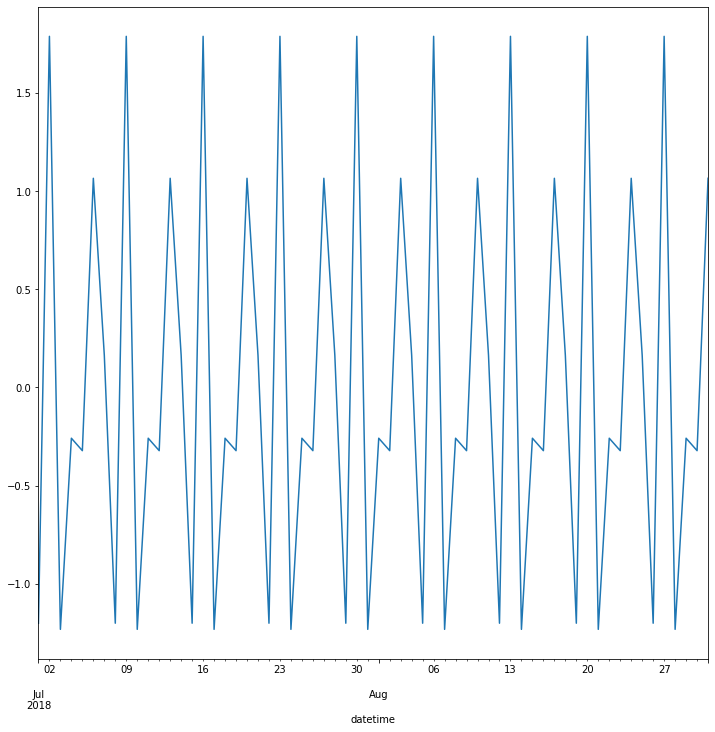

In [19]:
decomposed = seasonal_decompose(dfday0708)
decomposed.seasonal.plot(figsize=(12,12))

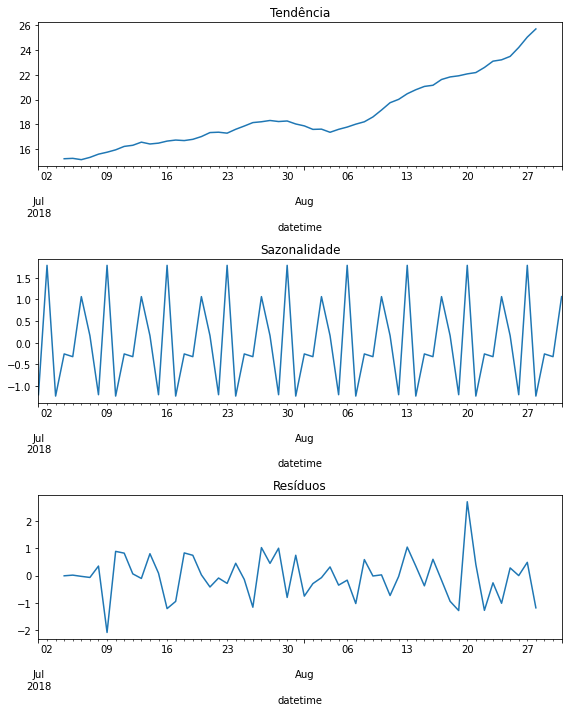

In [20]:
plt.figure(figsize=(8, 10))
plt.subplot(311)

decomposed.trend.plot(ax=plt.gca())
plt.title('Tendência')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Sazonalidade')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Resíduos')
plt.tight_layout()

**Conclusão**
* Uma tendência clara crescente que se mantêm no mês todo, a não ser no final do mês para a entrada do próximo, nota-se uma queda em todos os gráficos de todos os meses que na troca há uma queda de tendência, mesmo que não tão brusca.
* O comportamento de sazonalidade se mantêm estacionário.
* Final de agosto teve o maior pico em relação a todos os meses em num_orders.

**Análise de dias da semana**

* Dias de **menos** atividade **em comum** entre os meses: **Terça e Domingo**
* Dias de **mais** atividade **em comum** entre os meses: **Segunda e Sexta**

## Treinamento

In [21]:
def make_features(df, max_lag, rolling_mean_size):
    df['year'] = df.index.year
    df['month'] = df.index.month
    df['day'] = df.index.day
    df['dayofweek'] = df.index.dayofweek

    for lag in range(1, max_lag + 1):
        df['lag_{}'.format(lag)] = df['num_orders'].shift(lag)

    df['rolling_mean'] = (
        df['num_orders'].shift().rolling(rolling_mean_size).mean()
    )


make_features(df, 4, 4)
display(df.head())

,num_orders,year,month,day,dayofweek,lag_1,lag_2,lag_3,lag_4,rolling_mean
datetime,,,,,,,,,,
2018-03-01 00:00:00,9,2018,3,1,3,NaN,NaN,NaN,NaN,NaN
2018-03-01 00:10:00,14,2018,3,1,3,9.0,NaN,NaN,NaN,NaN
2018-03-01 00:20:00,28,2018,3,1,3,14.0,9.0,NaN,NaN,NaN
2018-03-01 00:30:00,20,2018,3,1,3,28.0,14.0,9.0,NaN,NaN
2018-03-01 00:40:00,32,2018,3,1,3,20.0,28.0,14.0,9.0,17.75


In [22]:
make_features(df, 6, 10)

train, test = train_test_split(df, shuffle=False, test_size=0.1)
print(train.index.min(), train.index.max())
print(test.index.min(), test.index.max())

train = train.dropna()

features_train = train.drop(['num_orders'], axis=1)
target_train = train['num_orders']
features_test = test.drop(['num_orders'], axis=1)
target_test = test['num_orders']

model = LinearRegression()
model.fit(features_train, target_train)

pred_train = model.predict(features_train)

rmsetrain = np.sqrt(mean_squared_error(target_train, pred_train))

print('RMSE Train:',rmsetrain)


2018-03-01 00:00:00 2018-08-13 14:10:00
2018-08-13 14:20:00 2018-08-31 23:50:00
RMSE Train: 5.5947316270809395


In [30]:
%%time
param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(features_train, target_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Melhores hiperparâmetros:", best_params)
print("Melhor pontuação:", best_score)

Melhores hiperparâmetros: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
Melhor pontuação: -5.559553700464981
CPU times: user 1.11 s, sys: 1.9 s, total: 3.01 s
Wall time: 2.99 s


In [36]:
model1 = LinearRegression(copy_X=True,fit_intercept=False,normalize=True)
model1.fit(features_train, target_train)

pred_train = model1.predict(features_train)

rmsetrain = np.sqrt(mean_squared_error(target_train, pred_train))

print('RMSE Train:',rmsetrain)

RMSE Train: 5.5947316270809395


In [39]:
-cross_val_score(model1, features_train, target_train, cv=5, scoring='neg_root_mean_squared_error').mean()

5.559553700464981

## Testando

In [40]:
pred_test = model1.predict(features_test)
rmsetest = np.sqrt(mean_squared_error(target_test, pred_test))
print('RMSE Test:',rmsetest)

RMSE Test: 8.42756317929164


In [45]:
-cross_val_score(model1, features_test, target_test, cv=5, scoring='neg_root_mean_squared_error').mean()

8.280282851128966

## Conclusão Final

**Análise**
* O comportamento da sazonalidade de todos os meses se mantêm estacionário


* A linha de tendência sempre cresce conforme os meses passam, porém na troca dos meses existe uma queda.


* Os dias da semana mais frequentes que **menos** tem atividade dentre todos os meses são: **Terça** em primeiro lugar presente em todos os meses e **Domingo** logo em seguida presente em todos menos abril.


* Os dias da semana mais frequentes que **mais** tem atividade dentre todos os meses são: **Sexta** em primeiro lugar presente nos meses de Março, Abril, Junho, Julho e Agosto. **Segunda** logo em seguida presente nos meses de Abril, Maio, Julho e Agosto

**Modelo**
* O modelo de predição de pedidos de taxi para a próxima hora obteve um desempenho muito bom onde o RMSE foi de 8.43 aproximadamente. O que significa que nosso modelo tem uma margem de erro de 8.43 pedidos por hora, sendo que nossa meta era menor que 48 então o desempenho foi excelente.
